**Gather**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load the dataset
Supermarket = pd.read_csv('Python Project Data - Supermarket Sales.csv')


In [ ]:
Supermarket

,Invoice ID,Branch,Yangon,Naypyitaw,Mandalay,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating,Subtotal
0,750-67-8428,A,1,0,0,Normal,Male,Health and beauty,74.69,7.0,26.1415,548.9715,1/5/2019,13:08,Ewallet,9.1,522.83
1,226-31-3081,C,0,1,0,Normal,Male,Electronic accessories,15.28,5.0,3.8200,80.2200,3/8/2019,10:29,Cash,9.6,76.40
2,631-41-3108,A,1,0,0,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,3/3/2019,13:23,Credit card,7.4,324.31
3,123-19-1176,A,1,0,0,Normal,Male,Health and beauty,58.22,8.0,23.2880,489.0480,1/27/2019,8 - 30 PM,Ewallet,8.4,465.76
4,373-73-7910,A,1,0,0,Normal,Male,Sports and travel,86.31,7.0,30.2085,634.3785,2/8/2019,10:37,Ewallet,5.3,604.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,861-77-0145,C,0,1,0,Member,Male,Electronic accessories,81.97,10.0,40.9850,860.6850,3/3/2019,14:30,Cash,9.2,819.70
1002,479-26-8945,B,0,0,1,Member,Female,Sports and travel,16.49,2.0,1.6490,34.6290,2/5/2019,11:32,Ewallet,4.6,32.98
1003,210-67-5886,C,0,1,0,Member,Female,Health and beauty,98.21,3.0,14.7315,309.3615,2/5/2019,10:41,Credit card,7.8,294.63
1004,227-78-1148,B,0,0,1,Normal,Female,Fashion accessories,72.84,7.0,25.4940,535.3740,2/15/2019,12:44,Cash,8.4,509.88


**Assess**

In [ ]:
Supermarket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice ID     1006 non-null   object 
 1   Branch         1006 non-null   object 
 2   Yangon         1006 non-null   int64  
 3   Naypyitaw      1006 non-null   int64  
 4   Mandalay       1006 non-null   int64  
 5   Customer type  1006 non-null   object 
 6   Gender         1006 non-null   object 
 7   Product line   1006 non-null   object 
 8   Unit price     1006 non-null   object 
 9   Quantity       1006 non-null   int64  
 10  Tax 5%         997 non-null    float64
 11  Total          1003 non-null   float64
 12  Date           1006 non-null   object 
 13  Time           1006 non-null   object 
 14  Payment        1006 non-null   object 
 15  Rating         1006 non-null   float64
dtypes: float64(3), int64(4), object(9)
memory usage: 125.9+ KB


In [ ]:
Supermarket.describe()

,Yangon,Naypyitaw,Mandalay,Quantity,Tax 5%,Total,Rating
count,1006.000000,1006.000000,1006.000000,1006.000000,997.000000,1003.000000,1006.000000
mean,0.338966,0.329026,0.332008,5.469185,15.479682,322.734689,7.056163
std,0.473594,0.470093,0.471168,3.014153,11.728320,245.865964,3.318751
min,0.000000,0.000000,0.000000,-8.000000,0.508500,10.678500,4.000000
25%,0.000000,0.000000,0.000000,3.000000,5.986500,123.789750,5.500000
50%,0.000000,0.000000,0.000000,5.000000,12.227500,254.016000,7.000000
75%,1.000000,1.000000,1.000000,8.000000,22.720500,471.009000,8.500000
max,1.000000,1.000000,1.000000,10.000000,49.650000,1042.650000,97.000000


In [ ]:
Supermarket.isnull().sum()

,0
Invoice ID,0
Branch,0
Yangon,0
Naypyitaw,0
Mandalay,0
Customer type,0
Gender,0
Product line,0
Unit price,0
Quantity,0


In [ ]:
Supermarket.duplicated().sum()

6

**Quality**

**Supermarket Sales Table:**

-**Quantity column:** There were negative values in the "Quantity" column, which were replaced with the mean of the positive values.

-**Rating column:** Some ratings were below 1 or above 10, and they were replaced with the median value.

-**Missing Tax 5% and Total:** Missing values in the "Tax 5%" and "Total" columns were filled using appropriate formulas based on the subtotal.

-**Unit Price and Quantity columns:** Values were converted to numeric using pd.to_numeric to fix errors caused by invalid entries.

-**Duplicate records:** Duplicate records were found and removed using the drop_duplicates() method.

-**Outliers in Total:** The IQR method was applied to detect outliers in the "Total" column, and outlier values were removed
.
-**Total column:** Missing values in the "Total" column were filled with the mean when the total was less than 10.

-**Unit Price column:** Extremely high values in the "Unit Price" column were replaced with the mean of the column.

-**Null values in Subtotal, Tax, and Total columns:** Missing values were filled using mathematical formulas based on other columns (Subtotal + Tax 5% = Total).

-**Erroneous Data Types:** Data types were corrected for columns like "Quantity" and "Unit price" to ensure they contained proper numeric values.

-**Invalid or missing values:** Invalid values were handled by replacing missing entries with either mean or calculated values based on other columns.


**Define**
In this phase, we define the steps required for cleaning the data. The main objective is to prepare the dataset by handling missing values, correcting erroneous data types, removing duplicates, and handling outliers.

**Key tasks:**

**Handle Missing Values:** Identify and fill or remove missing values.

**Fix Erroneous Data Types:** Ensure that all columns have the appropriate data types (e.g., numeric, string).

**Remove Duplicates:** Check for and remove duplicate records.

**Handle Outliers:** Detect and manage outliers in numeric columns.


**code**

In [ ]:
#Fix negative Quantity values
mean_quantity = Supermarket[Supermarket['Quantity'] > 0]['Quantity'].mean()
Supermarket.loc[Supermarket['Quantity'] < 0, 'Quantity'] = mean_quantity

<ipython-input-13-313423c5016c>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '5.514970059880239' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  Supermarket.loc[Supermarket['Quantity'] < 0, 'Quantity'] = mean_quantity


In [ ]:
# Fix out-of-range Ratings
Supermarket.loc[(Supermarket['Rating'] < 1) | (Supermarket['Rating'] > 10), 'Rating'] = Supermarket['Rating'].median()


In [ ]:
# Convert data types
Supermarket['Quantity'] = pd.to_numeric(Supermarket['Quantity'], errors='coerce')
Supermarket['Unit price'] = pd.to_numeric(Supermarket['Unit price'], errors='coerce')

# Calculate the Subtotal
Supermarket['Subtotal'] = Supermarket['Quantity'] * Supermarket['Unit price']

In [ ]:
# Fix missing Tax and Total values
Supermarket['Subtotal'] = Supermarket['Quantity'] * Supermarket['Unit price']
Supermarket['Tax 5%'] = Supermarket['Tax 5%'].fillna(Supermarket['Subtotal'] * 0.05)
Supermarket['Total'] = Supermarket['Total'].fillna(Supermarket['Subtotal'] + Supermarket['Tax 5%'])



In [ ]:
Supermarket.isnull().sum()

,0
Invoice ID,0
Branch,0
Yangon,0
Naypyitaw,0
Mandalay,0
Customer type,0
Gender,0
Product line,0
Unit price,5
Quantity,0


In [ ]:
# Remove Duplicates

Supermarket_cleaned = Supermarket.drop_duplicates()


In [ ]:
# Fix extremely low Total values
Supermarket_cleaned['Total'] = Supermarket_cleaned['Total'].apply(lambda x: Supermarket_cleaned['Total'].mean() if x < 10 else x)


<ipython-input-19-98ee10c1a01d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Supermarket_cleaned['Total'] = Supermarket_cleaned['Total'].apply(lambda x: Supermarket_cleaned['Total'].mean() if x < 10 else x)


In [ ]:
# Fix high Unit price values
Supermarket_cleaned['Unit price'] = Supermarket_cleaned['Unit price'].apply(lambda x: Supermarket_cleaned['Unit price'].mean() if x > 100 else x)


<ipython-input-20-593746b4d155>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Supermarket_cleaned['Unit price'] = Supermarket_cleaned['Unit price'].apply(lambda x: Supermarket_cleaned['Unit price'].mean() if x > 100 else x)


In [ ]:
# Handle Outliers using IQR

Q1 = Supermarket_cleaned['Total'].quantile(0.25)
Q3 = Supermarket_cleaned['Total'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

Supermarket_cleaned = Supermarket_cleaned[(Supermarket_cleaned['Total'] >= lower_bound) & (Supermarket_cleaned['Total'] <= upper_bound)]

In [ ]:
#check missing
Supermarket_cleaned.describe()

,Yangon,Naypyitaw,Mandalay,Unit price,Quantity,Tax 5%,Total,Rating,Subtotal
count,991.000000,991.000000,991.000000,986.000000,991.000000,986.000000,991.000000,991.000000,986.000000
mean,0.342079,0.324924,0.332997,55.515254,5.467265,15.135961,316.604752,6.976993,302.719229
std,0.474645,0.468583,0.471523,26.190945,2.898918,11.316738,237.709589,1.714777,226.334760
min,0.000000,0.000000,0.000000,10.080000,1.000000,0.508500,10.678500,4.000000,10.170000
25%,0.000000,0.000000,0.000000,33.202500,3.000000,5.978750,122.167500,5.500000,119.575000
50%,0.000000,0.000000,0.000000,54.980000,5.000000,12.066000,252.756000,7.000000,241.320000
75%,1.000000,1.000000,1.000000,77.545000,8.000000,22.305750,464.667000,8.500000,446.115000
max,1.000000,1.000000,1.000000,99.960000,10.000000,45.325000,951.825000,10.000000,906.500000


In [ ]:
Supermarket_cleaned.isnull().sum()

,0
Invoice ID,0
Branch,0
Yangon,0
Naypyitaw,0
Mandalay,0
Customer type,0
Gender,0
Product line,0
Unit price,5
Quantity,0


In [ ]:
# Fill missing values with median

Supermarket_cleaned['Unit price'] = Supermarket_cleaned['Unit price'].fillna(Supermarket_cleaned['Unit price'].median())

Supermarket_cleaned['Quantity'] = Supermarket_cleaned['Quantity'].fillna(Supermarket_cleaned['Quantity'].median())

Supermarket_cleaned['Subtotal'] = Supermarket_cleaned['Quantity'] * Supermarket_cleaned['Unit price']

Supermarket_cleaned['Tax 5%'] = Supermarket_cleaned['Tax 5%'].fillna(Supermarket_cleaned['Subtotal'] * 0.05)

Supermarket_cleaned['Total'] = Supermarket_cleaned['Subtotal'] + Supermarket_cleaned['Tax 5%']




Test

In [ ]:
# Check missing values and duplicates

Supermarket_cleaned.isnull().sum()

,0
Invoice ID,0
Branch,0
Yangon,0
Naypyitaw,0
Mandalay,0
Customer type,0
Gender,0
Product line,0
Unit price,0
Quantity,0


In [ ]:
# Check missing values and duplicates

Supermarket_cleaned.duplicated().sum()

0

In [ ]:
# Check missing values and duplicates

Supermarket_cleaned.describe()


,Yangon,Naypyitaw,Mandalay,Unit price,Quantity,Tax 5%,Total,Rating,Subtotal
count,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000
mean,0.342079,0.324924,0.332997,55.512553,5.467265,15.137431,317.886061,6.976993,302.748630
std,0.474645,0.468583,0.471523,26.124750,2.898918,11.288207,237.052342,1.714777,225.764135
min,0.000000,0.000000,0.000000,10.080000,1.000000,0.508500,10.678500,4.000000,10.170000
25%,0.000000,0.000000,0.000000,33.235000,3.000000,5.985000,125.685000,5.500000,119.700000
50%,0.000000,0.000000,0.000000,54.980000,5.000000,12.096000,254.016000,7.000000,241.920000
75%,1.000000,1.000000,1.000000,77.485000,8.000000,22.127000,464.667000,8.500000,442.540000
max,1.000000,1.000000,1.000000,99.960000,10.000000,45.325000,951.825000,10.000000,906.500000


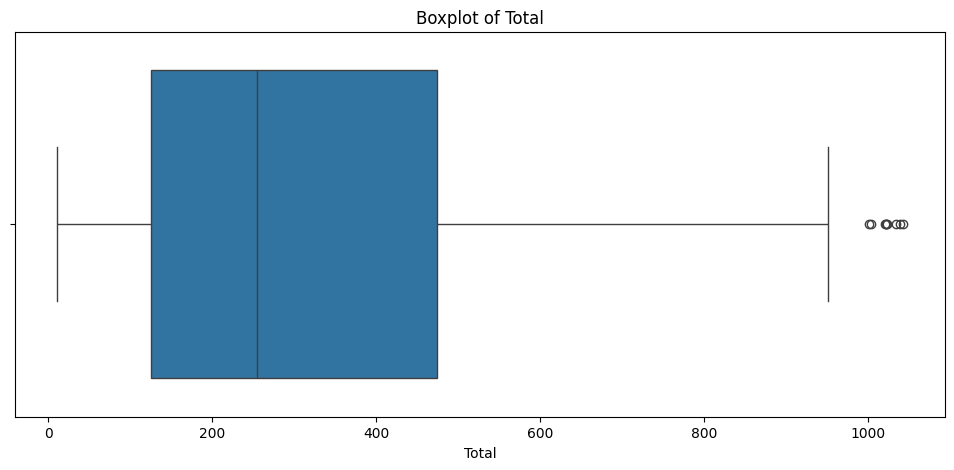

In [ ]:
# Visualization
plt.figure(figsize=(12,5))
sns.boxplot(x=Supermarket['Total'])
plt.title('Boxplot of Total')
plt.show()

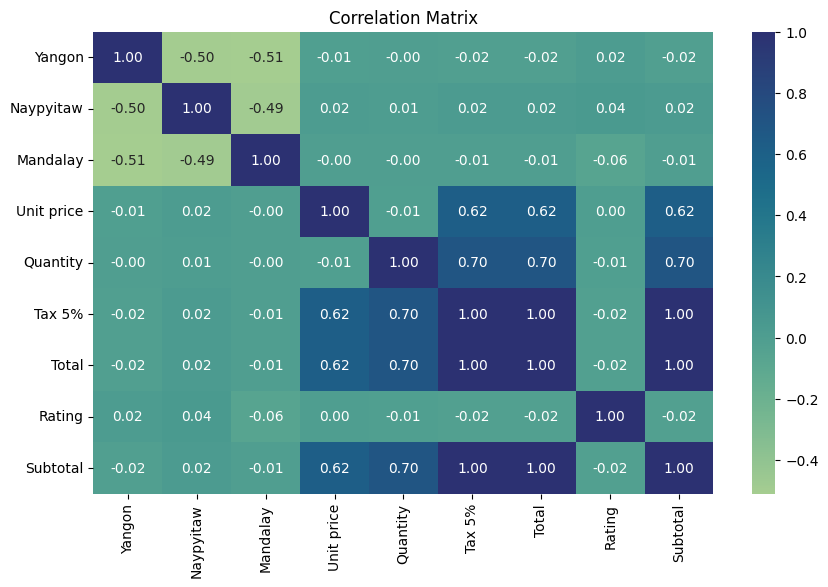

In [ ]:
plt.figure(figsize=(10, 6))
# Select only numerical columns for correlation
numerical_cols = Supermarket_cleaned.select_dtypes(include=np.number).columns
correlation_matrix = Supermarket_cleaned[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="crest", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

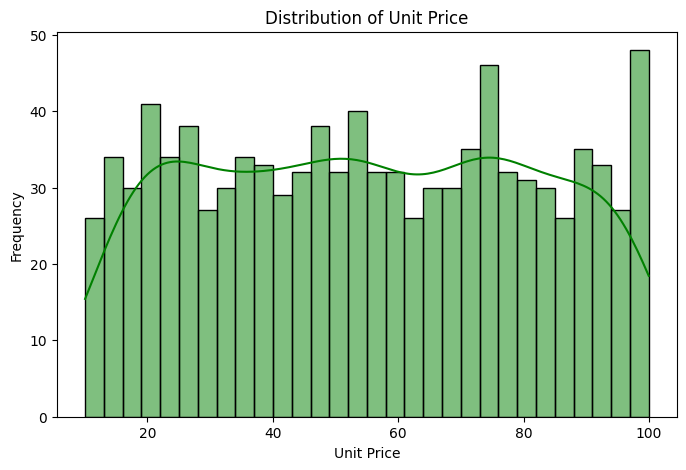

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(Supermarket_cleaned['Unit price'], kde=True, bins=30, color='green')
plt.title('Distribution of Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.show()

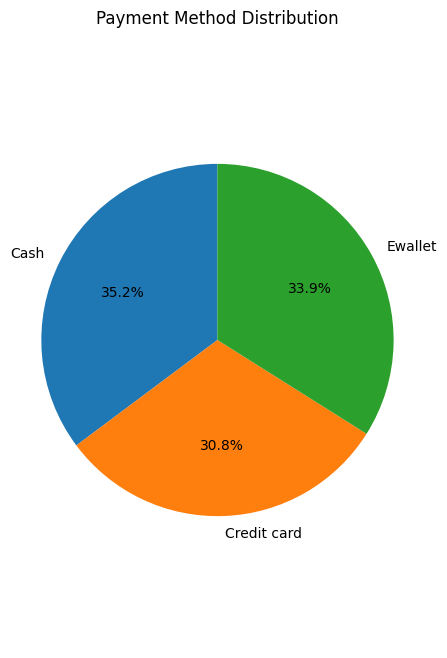

In [ ]:
payment_totals = Supermarket_cleaned.groupby('Payment')['Total'].sum()

plt.figure(figsize=(5, 8))
plt.pie(payment_totals, labels=payment_totals.index, autopct='%1.1f%%', startangle=90)
plt.title('Payment Method Distribution')
plt.axis('equal')
plt.show()